In [1]:
#importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import decomposition
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.figure_factory as ff
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Files download

In [2]:
dispo_alim = pd.read_csv (r'C:\Users\erict\Desktop\DisponibiliteAlimentaire_2017.csv')
pop = pd.read_csv (r'C:\Users\erict\Desktop\Population_2000_2018.csv')

Dataframe

In [3]:
dispo_alim.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
test_un = dispo_alim.loc[dispo_alim['Produit'] == 'Viande de Volailles']
test = test_un.loc[test_un['Code Élément'].isin([664,5611])]
test = test.drop(test.columns[[0,1,2,4,6,7,8,9,10,12,13]], axis= 1)
test

,Zone,Élément,Valeur
652,Afghanistan,Importations - Quantité,29.0
659,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),5.0
1705,Afrique du Sud,Importations - Quantité,514.0
1714,Afrique du Sud,Disponibilité alimentaire (Kcal/personne/jour),143.0
2714,Albanie,Importations - Quantité,38.0
...,...,...,...
174326,Yémen,Disponibilité alimentaire (Kcal/personne/jour),30.0
175362,Zambie,Importations - Quantité,12.0
175371,Zambie,Disponibilité alimentaire (Kcal/personne/jour),11.0
176389,Zimbabwe,Importations - Quantité,6.0


In [5]:
test_melt = pd.melt(test, id_vars = ['Zone','Élément'], value_vars = ['Valeur'], var_name = 'Valeur')
test_melt

,Zone,Élément,Valeur,value
0,Afghanistan,Importations - Quantité,Valeur,29.0
1,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Valeur,5.0
2,Afrique du Sud,Importations - Quantité,Valeur,514.0
3,Afrique du Sud,Disponibilité alimentaire (Kcal/personne/jour),Valeur,143.0
4,Albanie,Importations - Quantité,Valeur,38.0
...,...,...,...,...
337,Yémen,Disponibilité alimentaire (Kcal/personne/jour),Valeur,30.0
338,Zambie,Importations - Quantité,Valeur,12.0
339,Zambie,Disponibilité alimentaire (Kcal/personne/jour),Valeur,11.0
340,Zimbabwe,Importations - Quantité,Valeur,6.0


In [6]:
test_pivot = test_melt.pivot(index=['Zone'],columns = 'Élément', values = ['value'] )
test_pivot.columns = test_pivot.columns.droplevel()
modified_test = test_pivot.rename_axis(None,axis=1)
tableau_finalisé = modified_test
tableau_finalisé = tableau_finalisé.dropna()
tableau_finalisé

,Disponibilité alimentaire (Kcal/personne/jour),Importations - Quantité
Zone,,
Afghanistan,5.0,29.0
Afrique du Sud,143.0,514.0
Albanie,85.0,38.0
Algérie,22.0,2.0
Allemagne,71.0,842.0
...,...,...
Émirats arabes unis,147.0,433.0
Équateur,83.0,0.0
États-Unis d'Amérique,219.0,123.0


Data cleaning

In [7]:
print(tableau_finalisé.isnull().sum())

Disponibilité alimentaire (Kcal/personne/jour)    0
Importations - Quantité                           0
dtype: int64


"Pour la partie analyse, dans un premier temps j’aimerais que tu testes la classification ascendante hiérarchique, avec un dendrogramme comme visualisation"

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z, names):
    plt.figure(figsize=(15,20))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "right",
        leaf_font_size=9.,
    )
    plt.show()

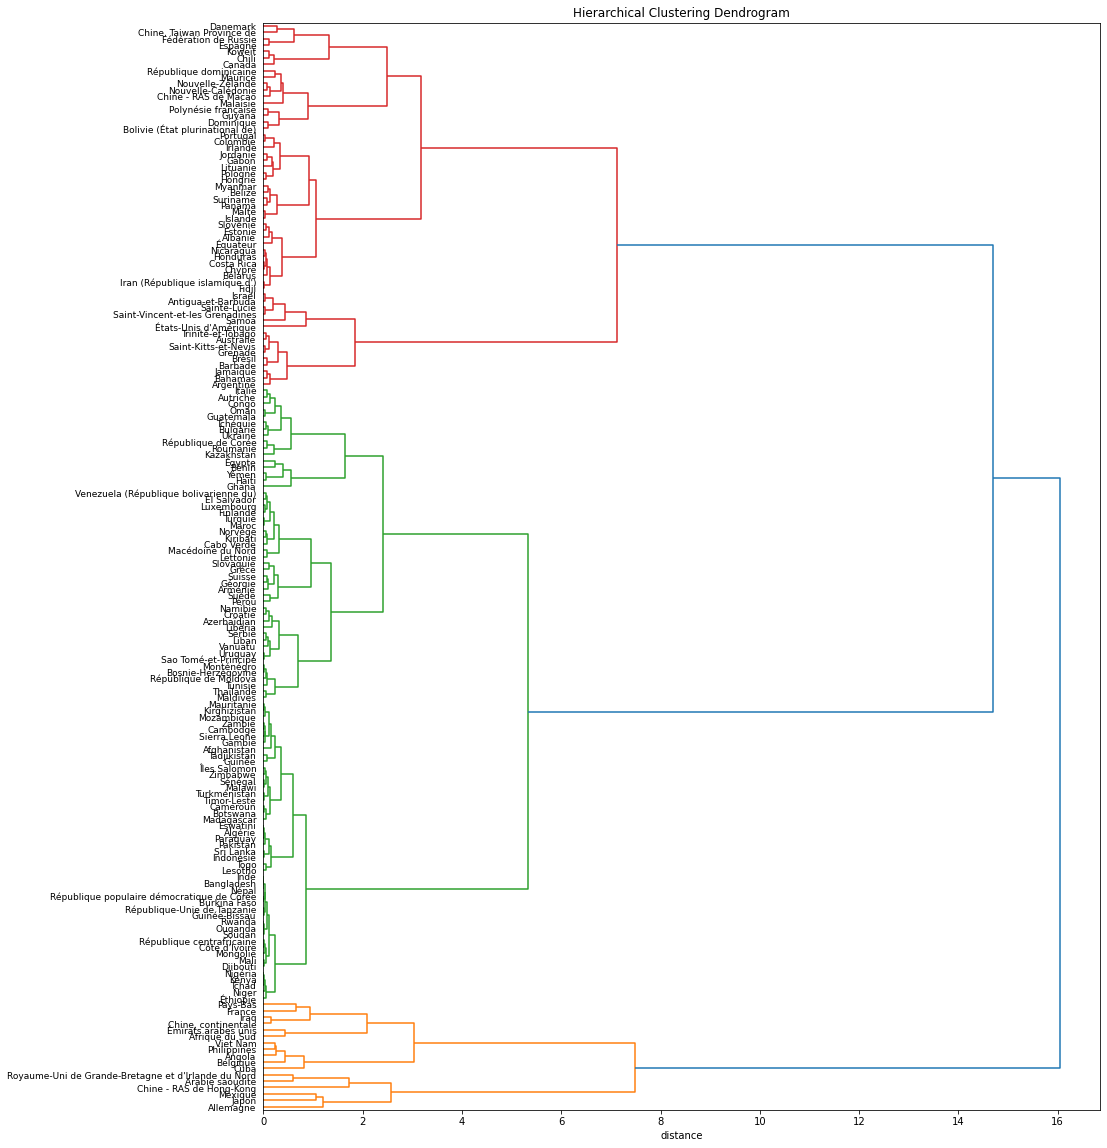

In [9]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

# import de l'échantillon et des informations relatives aux cours
data = tableau_finalisé

# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)


"Ensuite tu pourras utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes." 

C:\Users\erict\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


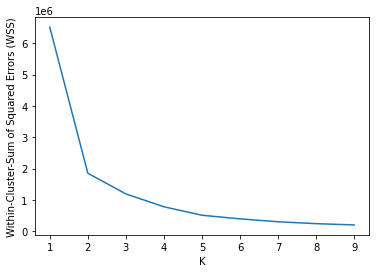

In [10]:
# il faut d'abord determiner le nombre de clusters optimals
# utilisation de la methode du coude
# on observe la valeur de K au_dela de laquelle la diminution est la plus faible 
K=range(1,10)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(tableau_finalisé)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

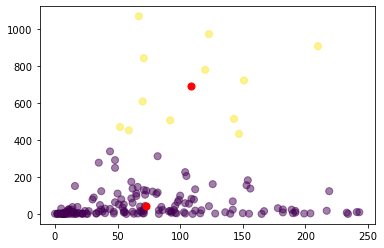

In [11]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2).fit(tableau_finalisé)
centroids = kmeans.cluster_centers_

plt.scatter(tableau_finalisé['Disponibilité alimentaire (Kcal/personne/jour)'], tableau_finalisé['Importations - Quantité'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [12]:
#import des librairies 
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# import de l'échantillon
data = tableau_finalisé

# préparation des données pour le clustering
x = data.values

#Cluster K-means
model=KMeans(n_clusters=2)

#adapter le modèle de données
model.fit(x)

cluster_pays = {}

indexes = tableau_finalisé.index.values.tolist()

for i in range(len(indexes)):
    cluster_pays[indexes[i]] = model.labels_[i]

print(cluster_pays)

country_of_interest = [k for k, v in cluster_pays.items() if v == 1]
country_of_interest

{'Afghanistan': 0, 'Afrique du Sud': 1, 'Albanie': 0, 'Algérie': 0, 'Allemagne': 1, 'Angola': 0, 'Antigua-et-Barbuda': 0, 'Arabie saoudite': 1, 'Argentine': 0, 'Arménie': 0, 'Australie': 0, 'Autriche': 0, 'Azerbaïdjan': 0, 'Bahamas': 0, 'Bangladesh': 0, 'Barbade': 0, 'Belgique': 0, 'Belize': 0, 'Bolivie (État plurinational de)': 0, 'Bosnie-Herzégovine': 0, 'Botswana': 0, 'Brésil': 0, 'Bulgarie': 0, 'Burkina Faso': 0, 'Bélarus': 0, 'Bénin': 0, 'Cabo Verde': 0, 'Cambodge': 0, 'Cameroun': 0, 'Canada': 0, 'Chili': 0, 'Chine - RAS de Hong-Kong': 1, 'Chine - RAS de Macao': 0, 'Chine, Taiwan Province de': 0, 'Chine, continentale': 1, 'Chypre': 0, 'Colombie': 0, 'Congo': 0, 'Costa Rica': 0, 'Croatie': 0, 'Cuba': 0, "Côte d'Ivoire": 0, 'Danemark': 0, 'Djibouti': 0, 'Dominique': 0, 'El Salvador': 0, 'Espagne': 0, 'Estonie': 0, 'Eswatini': 0, 'Fidji': 0, 'Finlande': 0, 'France': 1, 'Fédération de Russie': 0, 'Gabon': 0, 'Gambie': 0, 'Ghana': 0, 'Grenade': 0, 'Grèce': 0, 'Guatemala': 0, 'Guinée': 

['Afrique du Sud',
 'Allemagne',
 'Arabie saoudite',
 'Chine - RAS de Hong-Kong',
 'Chine, continentale',
 'France',
 'Iraq',
 'Japon',
 'Mexique',
 'Pays-Bas',
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
 'Émirats arabes unis']

une heatmap avec les croisements entre les clusters de pays et les différentes variables (en format image), afin que je puisse tout de suite me faire une idée des différents groupes que tu auras définis

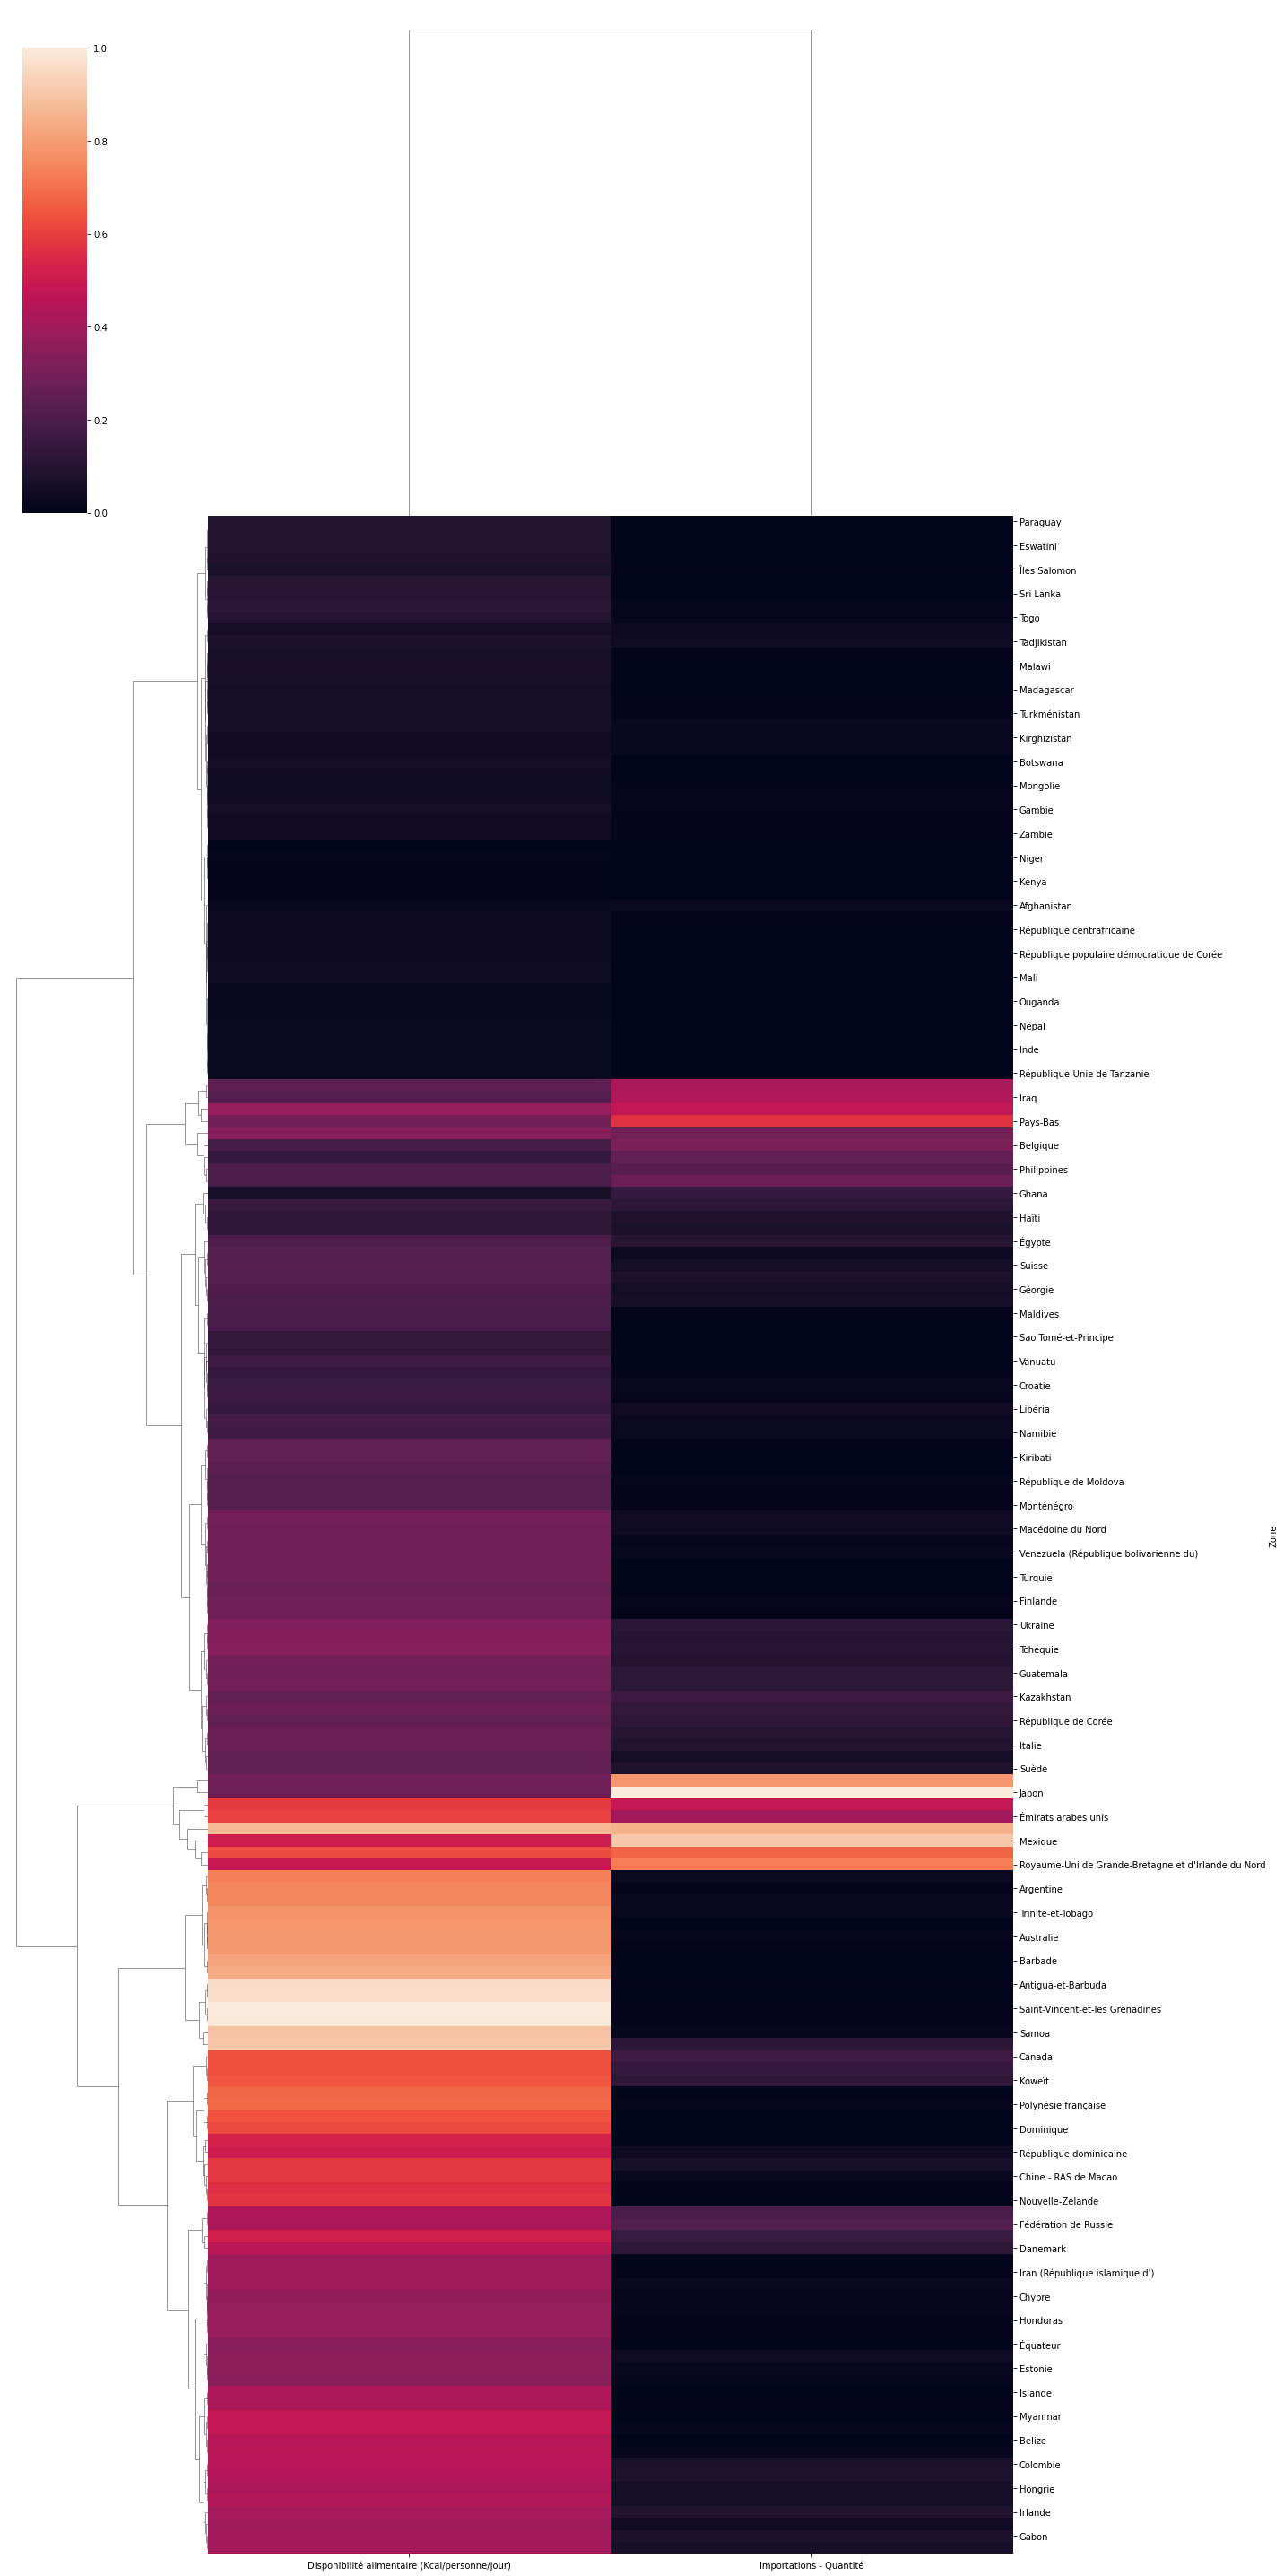

In [13]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Default plot
heatmap = sns.clustermap(tableau_finalisé, method ='ward',standard_scale=1, figsize=(20, 40))

# Show the graph
plt.show()

In [14]:
heatmap.savefig('/Users/erict/Downloads/heatmap.png', bbox_inches= 'tight')